In [263]:
#imports
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
from matplotlib.patches import Polygon
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder,CategoricalEncoder, LabelEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from pulp import *

In [271]:
#datasets
#Q1 Yeast
yeast = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data',
                    delim_whitespace=True,header=None)

#### Q1 Hierarchal and Clustering 
Use one of the following UCI machine learning datasets for a k-means or hierarchical
clustering. Select an initial value for k based on a look at the descriptive statistics for the
dataset.

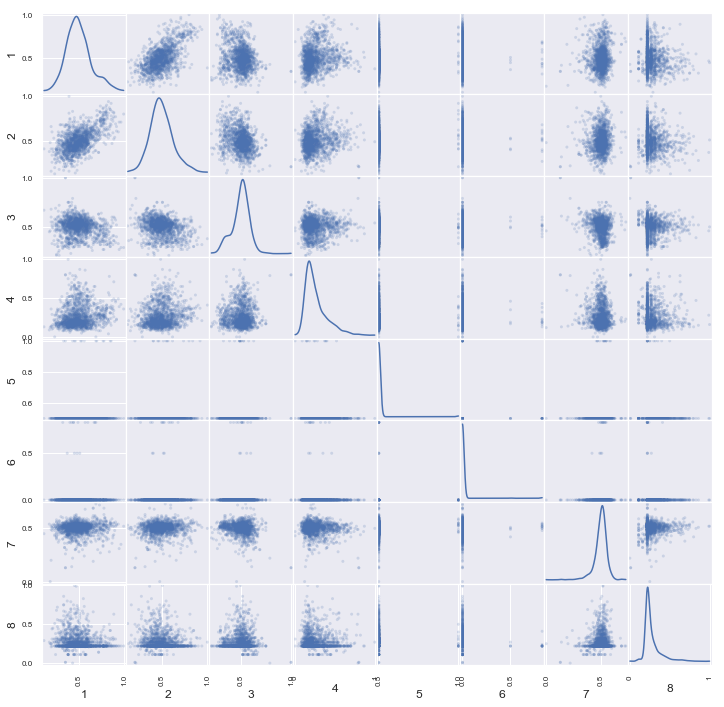

In [272]:
#with diagnols set as kernel denstiy graphs, alt option is histogram
scatter_matrix(yeast, alpha = 0.2, figsize = (12, 12), diagonal = 'kde')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e948390>,
      dtype=object)

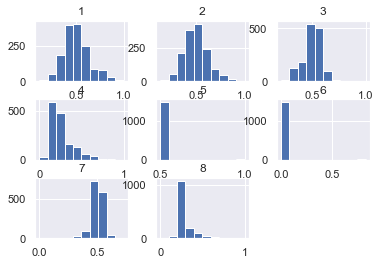

In [266]:
yeast.hist()

In [267]:
yeast.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9     object
dtype: object

In [268]:
# target: nuc: Score of discriminant analysis of nuclear 
# localization signals of nuclear and non-nuclear proteins.
# k = 10
yeast[9].value_counts() #target col value counts

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: 9, dtype: int64

In [273]:
# copy target columns and drop target column from yeast df
target = yeast[9]
yeast.drop([9], axis=1, inplace=True)

In [274]:
# isolate attributes
yeast.drop([0,5,6], axis=1, inplace=True)
attrs = list(yeast)

In [289]:
attrs

[1, 2, 3, 4, 7, 8]

In [276]:
#copy yeast df
yeast_no_scale_df = yeast.copy()

In [243]:
# custom transformer to convert dataframe to numpy multi dim array
class dataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attribute_names = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # special case where 1d array si returned, must be reshaped for encode
        if X[self.attribute_names].ndim == 1:
            return X[self.attribute_names].values.reshape(-1,1)
        return X[self.attribute_names].values

#### dropped name column 
since k means will use euclidean distance, this does not benefit our model

Wanted to test the LabelEncoder() class anyway

In [144]:
# label encode name category 
# le = LabelEncoder()
# strCol = yeast[0]
# yeast[0] = le.fit_transform(strCol.values.reshape(-1,1))

#### Pipeline Creation
num and cat
FeatureUnion to comine takes transfor_list as param

In [277]:
pipeline = Pipeline([
    ('selector', dataFrameSelector(attrs)),
    ('std_scaler', StandardScaler())
])

In [278]:
yeast_prepared = pipeline.fit_transform(yeast)
yeast_no_scale = pipe_no_scale.fit_transform(yeast)

In [288]:
yeast_prepared.shape

(1484, 6)

In [235]:
clf = KMeans(n_clusters=10)
clf.fit(yeast_prepared)
ymeans = clf.predict(yeast_prepared)

In [281]:
# current have yeast_prepared df
# append y means to df
#note yeast_prepared was converted to numpy array to be handled by tools
#yeast is still a pandas dataframe object 
clusters = pd.Series(ymeans)
#yeast.append(clusters, ignore_index=True)
yeast['ymeans'] = clusters
yeast['ymeans'].value_counts()


9    294
7    244
1    196
4    192
2    164
3    132
0    123
6     90
8     42
5      7
Name: ymeans, dtype: int64

In [292]:
# add target column back in
yeast['target'] = target

In [303]:
yeast.sort_values(by=['target'])  

,1,2,3,4,7,8,ymeans,target
1483,0.65,0.54,0.54,0.13,0.53,0.22,9,CYT
388,0.58,0.41,0.51,0.26,0.51,0.37,1,CYT
387,0.58,0.45,0.48,0.24,0.52,0.37,9,CYT
1238,0.57,0.35,0.50,0.43,0.53,0.22,4,CYT
1239,0.61,0.52,0.50,0.44,0.53,0.22,4,CYT
384,0.40,0.48,0.50,0.17,0.54,0.50,0,CYT
1242,0.63,0.43,0.48,0.11,0.51,0.22,9,CYT
382,0.55,0.41,0.56,0.21,0.52,0.22,1,CYT
381,0.31,0.45,0.50,0.17,0.49,0.22,7,CYT
380,0.44,0.51,0.48,0.38,0.52,0.22,4,CYT


#### Q2 Linear Programming
Dr. Lum teaches part-time at two different community colleges, Hilltop College and Serra
College. Dr. Lum can teach up to 5 classes per semester. For every class taught by him at
Hilltop College, he needs to spend 3 hours per week preparing lessons and grading papers,
and for each class at Serra College, he must do 4 hours of work per week. He has
determined that he cannot spend more than 18 hours per week preparing lessons and
grading papers. If he earns 4,000 per class at Hilltop College and $5,000 per class at Serra
College, how many classes should he teach at each college to maximize his income, and
what will be his income?

#### using graph to visualize intersection of feasible region

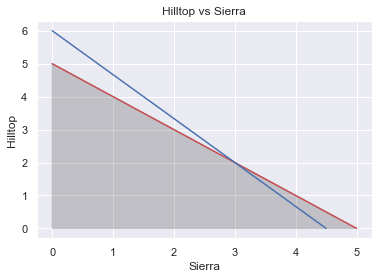

In [299]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
P = np.array([
    [0,0,5],
    [0,5,0]
    ])
props = {
    'xlabel': 'Sierra',
    'ylabel': 'Hilltop',
    'xticks': [0,1,2,3,4,5,6],
    'yticks': [0,1,2,3,4,5,6],
    'title':'Hilltop vs Sierra'
}
ax.set(**props)
ax.plot([0,5],[5,0], "r-")
ax.plot([0,4.5],[6,0])
plt.gca().add_artist(Polygon(P.T, alpha=0.2, color="k"))

#### Using PuLP

In [7]:
# create prob variable to contain data
prob = LpProblem("College Classes", LpMaximize)

In [8]:
# create problem variables
x1 = LpVariable("SierraClasses", 0, None, LpInteger)
x2 = LpVariable("HilltopClasses", 0, None,LpInteger)

In [10]:
# added objective function to prob using +=
prob += 5000*x1 + 4000*x2, "pay per class"

In [14]:
# constraints
prob += x1 +x2 <= 5, "class max"
prob += 4*x1 + 3*x2 <=18, "Hour limit"

In [15]:
# write to .lp file
prob.writeLP("classes.lp") # file that describes steps

In [16]:
prob.solve()

1

In [17]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [18]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

HilltopClasses = 2.0
SierraClasses = 3.0


In [20]:
# The optimised objective function value is printed to the screen
print("Max Income teaching class = ", value(prob.objective))

Max Income teaching class =  23000.0
